### Amazon clothing & apparel recommender system
**CSC 478 Final Project**  
George Nakhleh, Gunjan Pandya

About the dataset:  

Reviews from Amazon.com of Clothing, Shoes and Jewelry  
278,677 reviews

In [30]:
#Read the data

import numpy as np
import pandas as pd

with open('.\\Clothing_Shoes_and_Jewelry_5.json', 'r') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an array of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
data_df = pd.read_json(data_json_str)

In [31]:
#Look at the data

data_df.head(10)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0000031887,"[0, 0]",5,This is a great tutu and at a really great pri...,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800
1,0000031887,"[0, 0]",5,I bought this for my 4 yr old daughter for dan...,"01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600
2,0000031887,"[0, 0]",5,What can I say... my daughters have it in oran...,"01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600
3,0000031887,"[0, 0]",5,"We bought several tutus at once, and they are ...","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800
4,0000031887,"[0, 0]",5,Thank you Halo Heaven great product for Little...,"03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600
5,0000031887,"[0, 0]",4,I received this today and I'm not a fan of it ...,"03 31, 2014",A27UF1MSF3DB2,"C-Lo ""Cynthia""",It's ok,1396224000
6,0000031887,"[0, 0]",5,Bought this as a backup to the regular ballet ...,"05 3, 2014",A16GFPNVF4Y816,design maven,Great for dress-up and for ballet practice,1399075200
7,0000031887,"[0, 0]",5,Great tutu for a great price. It isn't a &#34;...,"12 23, 2012",A2M2APVYIB2U6K,Jamie P.,Great value,1356220800
8,0000031887,"[0, 0]",4,"My daughter liked this, and it with her costum...","11 10, 2013",A1NJ71X3YPQNQ9,JBerger,Good,1384041600
9,0000031887,"[7, 8]",5,For what I paid for two tutus is unbeatable an...,"10 7, 2012",A3EERSWHAI6SO,"Jeffrey Hollingshead ""Jillian hollingshead""",WOW !! ..is all I have to say!,1349568000


Going to take a **sample** of the data, since the full set crashes the computer when making a user-item matrix

In [32]:
data_df = data_df.sample(frac = 0.15, random_state=209)

**About the data:**
Variables and their meaning:  
- `asin`:  ID of the product  
- `helpful`: helpfulness rating of the review, e.g. 2/3 
- `overall`: rating of the product 
- `reviewText`: text of the review
- `reviewTime`: time of the review (raw)
- `reviewerID`: ID of the reviewer
- `reviewerName`: name of the reviewer
- `summary`: summary of the review
- `unixReviewTime`: time of the review (unix time)

In [33]:
#For now, we'll only look at the variables we need to build a basic recommender system

data_df_slim = data_df[['asin', 'overall', 'reviewerID']]

In [34]:
#BASIC EDA

data_df_slim.describe(include='all')

,asin,overall,reviewerID
count,41802,41802.000000,41802
unique,17056,NaN,25626
top,B005LERHD8,NaN,A2KBV88FL48CFS
freq,76,NaN,14
mean,NaN,4.243768,NaN
std,NaN,1.103483,NaN
min,NaN,1.000000,NaN
25%,NaN,4.000000,NaN
50%,NaN,5.000000,NaN
75%,NaN,5.000000,NaN


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

data_df_slim['reviewerID'].value_counts()

A2KBV88FL48CFS    14
A2GA55P7WGHJCP    12
AA1ZYCEKJGG3A     11
A2USMIT2CSA08     11
A6XHF110BC856     11
A260QLS8Z33KCQ    11
AVUJP7Z6BNT11     11
A24PK4Q70CS0N0    10
A2OMZ8QPFZQBO4    10
ABLUW533DJ03T     10
AENH50GW3OKDA     10
A1KCUIY8RTA0RT    10
A1KT19TDP9VE63    10
A318XAP8UZZWVU     9
A2J4XMWKR8PPD0     9
A2FWDBKX76ILA7     9
A14B4MJ7KZE63B     9
AL4R7S0YP7MJR      9
A2JA4IKKDP153M     9
AB39HXPQYD7VN      9
A2IFY6958MRGEM     9
A3S2TK8BDV81FE     9
A1JHGHQW6YCOZ0     9
A2THIXG7X5T53F     9
AHCI6ZIQY1PZQ      8
A1RRMZKOMZ2M7J     8
A34Z9I3XYZOFYO     8
A2GP4EJIAA2OE0     8
A22CW0ZHY3NJH8     8
AC82XED9ZBMRW      8
                  ..
A2CCMNHY4LXNGP     1
AOC6CQ1MHA8UD      1
A3ALTLN501GE7M     1
A1PCX79L6QP8SF     1
AH9D6UNA3HWAA      1
A197HXB76QJ014     1
ASAE723AV7MYO      1
A3NPACKJFKAZIE     1
A2CI4HBJX8RXZT     1
A2BJRV131CQB5Y     1
A2FQB7BI12DVR5     1
A2VLCYC57BDRDR     1
AU2V04VZF3JUX      1
A1GH64KVS5XYGM     1
A1MWJZSR9WDOQA     1
A3OANPELJ49XT6     1
A1O1FCKRHHW3W

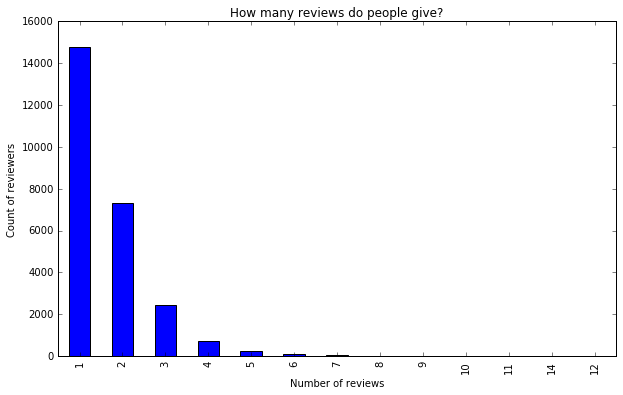

In [36]:
reviewer_counts = data_df_slim['reviewerID'].value_counts()

reviewer_counts.value_counts().plot(kind='bar', figsize=[10,6], title='How many reviews do people give?')
plt.xlabel("Number of reviews")
plt.ylabel("Count of reviewers")

In [37]:
#What % of reviewers give 5 reviews?
reviewer_counts.value_counts()/reviewer_counts.shape[0]

1     0.576797
2     0.285803
3     0.094982
4     0.027277
5     0.008585
6     0.003434
7     0.001600
8     0.000585
9     0.000429
10    0.000234
11    0.000195
14    0.000039
12    0.000039
Name: reviewerID, dtype: float64

In [38]:
#Understand distribution of ratings ('overall')

data_df_slim['overall'].value_counts()

5    24462
4     8719
3     4644
2     2303
1     1674
Name: overall, dtype: int64

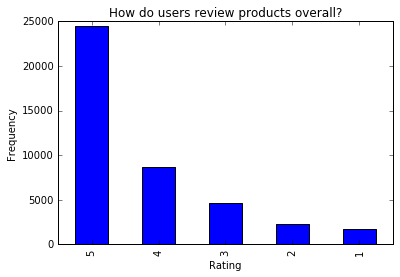

In [39]:
data_df_slim['overall'].value_counts().plot.bar(title='How do users review products overall?')
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [40]:
#What % of reviews are 5-star?
data_df_slim['overall'].value_counts()/data_df_slim.shape[0]

5    0.585187
4    0.208579
3    0.111095
2    0.055093
1    0.040046
Name: overall, dtype: float64

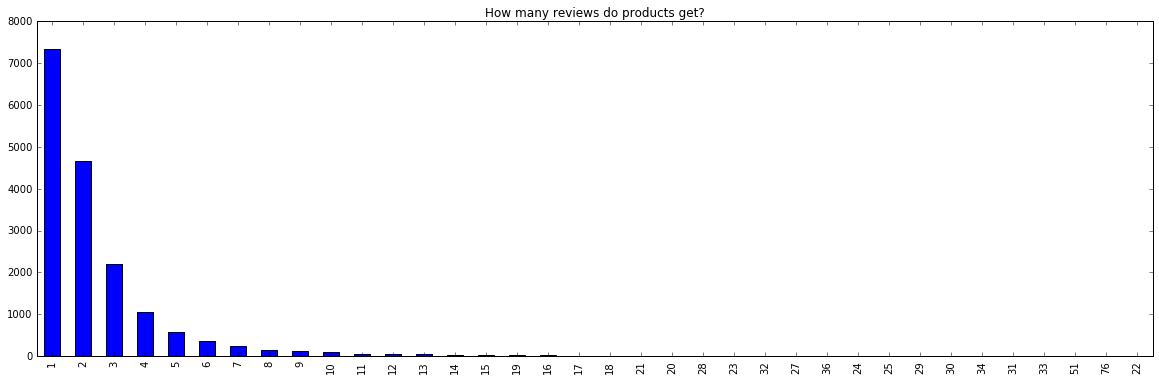

In [41]:
#We know there are 23k unique products in the data
#Whats the breakdown of how many reviews these products get?

#This series tells us something like "20 products got 5 reviews"
number_of_reviews_for_products = data_df_slim['asin'].value_counts().value_counts()

number_of_reviews_for_products.plot(kind='bar', figsize=[20,6], title="How many reviews do products get?")


In [42]:
number_of_reviews_for_products

1     7340
2     4655
3     2189
4     1062
5      586
6      356
7      238
8      142
9      120
10      86
11      60
12      40
13      39
14      23
15      17
19      15
16      15
17      12
18      10
21       9
20       7
28       4
23       4
32       4
27       3
36       3
24       3
25       3
29       2
30       2
34       2
31       1
33       1
51       1
76       1
22       1
Name: asin, dtype: int64

In [52]:
#I want to drop any rows (reviews) where the product is only reviewed once

every_products_reviewcount = data_df_slim['asin'].value_counts()
#every_products_reviewcount
one_review_products = list(every_products_reviewcount[every_products_reviewcount.values == 1].keys())

data_df_slim = data_df_slim[~data_df_slim.asin.isin(one_review_products)]

In [53]:
data_df_slim.shape

(34462, 3)

In [57]:
#Dropped all the 1 review products
number_of_reviews_for_products = data_df_slim['asin'].value_counts().value_counts()
number_of_reviews_for_products

2     4655
3     2189
4     1062
5      586
6      356
7      238
8      142
9      120
10      86
11      60
12      40
13      39
14      23
15      17
16      15
19      15
17      12
18      10
21       9
20       7
23       4
32       4
28       4
24       3
25       3
36       3
27       3
34       2
30       2
29       2
22       1
33       1
51       1
76       1
31       1
Name: asin, dtype: int64

In [58]:
#What % of products get x number of reviews?
number_of_reviews_for_products/number_of_reviews_for_products.sum()

2     0.479107
3     0.225298
4     0.109304
5     0.060313
6     0.036641
7     0.024496
8     0.014615
9     0.012351
10    0.008851
11    0.006175
12    0.004117
13    0.004014
14    0.002367
15    0.001750
16    0.001544
19    0.001544
17    0.001235
18    0.001029
21    0.000926
20    0.000720
23    0.000412
32    0.000412
28    0.000412
24    0.000309
25    0.000309
36    0.000309
27    0.000309
34    0.000206
30    0.000206
29    0.000206
22    0.000103
33    0.000103
51    0.000103
76    0.000103
31    0.000103
Name: asin, dtype: float64

In [59]:
#First stab at user-item matrix

user_item_try = pd.pivot_table(data = data_df_slim, values = 'overall', index = ['reviewerID'], columns = ['asin'])

In [60]:
user_item_try

asin,1608299953,1617160377,B00004SR8Z,B00004SR9P,B000051SEN,B00005TQI7,B0000643Q8,B00006I551,B00006XXGO,B000072UMJ,...,B00JB2IZ7I,B00JDPRJAM,B00JDT4IZM,B00JDU6W5A,B00JEILE9U,B00JG4SU80,B00JH0RWEG,B00JM5CCGO,B00JR53ULU,B00KA602SY
reviewerID,,,,,,,,,,,,,,,,,,,,,
A001114613O3F18Q5NVR6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00338282E99B8OR2JYTZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00354001GE099Q1FL0TU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00404823GU1Q517KP4Z8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00635603LUUJQPQWSJW1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0107229P6G90UKRJYQW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01103631SAT3BPLD52LV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01194842MEQEG9QC0W1M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0148968UM59JS3Y8D1M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
from sklearn import metrics

#Fill nan with zero
user_item_try = user_item_try.fillna(0)

similarity_matrix_cosine = metrics.pairwise.cosine_similarity(user_item_try)

In [64]:
similarity_matrix_cosine

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [74]:
similarity_matrix_cosine.shape

(22805, 22805)

In [75]:
def getUser(user_sim_mat,u):
   score=[]
   for others in range(len(user_sim_mat)):
       if others != u:
           score.append([user_sim_mat[u][others], others])
   score.sort()
   score.reverse()
   return score[:1]

In [76]:
getUser(similarity_matrix_cosine, 0)

[[1.0, 1058]]